In [2]:
! pip install simplification
import warnings
warnings.filterwarnings('ignore')

import ast
import math
import pandas as pd
import glob
import numpy as np
import cv2

from simplification.cutil import simplify_coords

import matplotlib.pyplot as plt
import matplotlib.style as style

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Doodle_Recognition/train_simplified

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Doodle_Recognition/train_simplified


In [4]:
path = '/content/drive/My Drive/Doodle_Recognition/train_simplified'
all_files = glob.glob("*.csv")

train = pd.DataFrame()
# Read 3 classes of datasets
counter = 0
for csv in all_files:
    if counter == 3:
      break
    data = pd.read_csv(csv, index_col = 'key_id', nrows=10)
    data['word'] = data['word'].replace(' ', '_', regex=True)
    train = train.append(data)
    counter+=1

train.head()

,countrycode,drawing,recognized,timestamp,word
key_id,,,,,
5027286841556992,GB,"[[[0, 22, 37, 64, 255], [218, 220, 227, 228, 2...",True,2017-03-11 14:47:44.052420,The_Eiffel_Tower
5716269791707136,FR,"[[[47, 47, 36, 26, 0, 10, 23, 46, 46, 63, 68, ...",True,2017-03-12 22:51:18.525950,The_Eiffel_Tower
5942899998982144,GB,"[[[184, 115, 67, 57, 36, 18], [251, 103, 12, 1...",True,2017-03-29 01:12:00.367980,The_Eiffel_Tower
6226163091374080,US,"[[[0, 187, 177, 132, 105, 79, 38, 19, 11], [24...",True,2017-03-29 16:48:54.912900,The_Eiffel_Tower
4889008825958400,GB,"[[[0, 21, 43, 83, 97, 158, 169, 172], [162, 16...",True,2017-03-04 15:50:45.198010,The_Eiffel_Tower


In [5]:
test_drawings = train
words = test_drawings['word'].tolist()

drawings = [ast.literal_eval(pts) for pts in test_drawings[0:4]['drawing'].values]
test_drawings['drawing'].iloc[0]

arr = test_drawings.drawing.values[0]

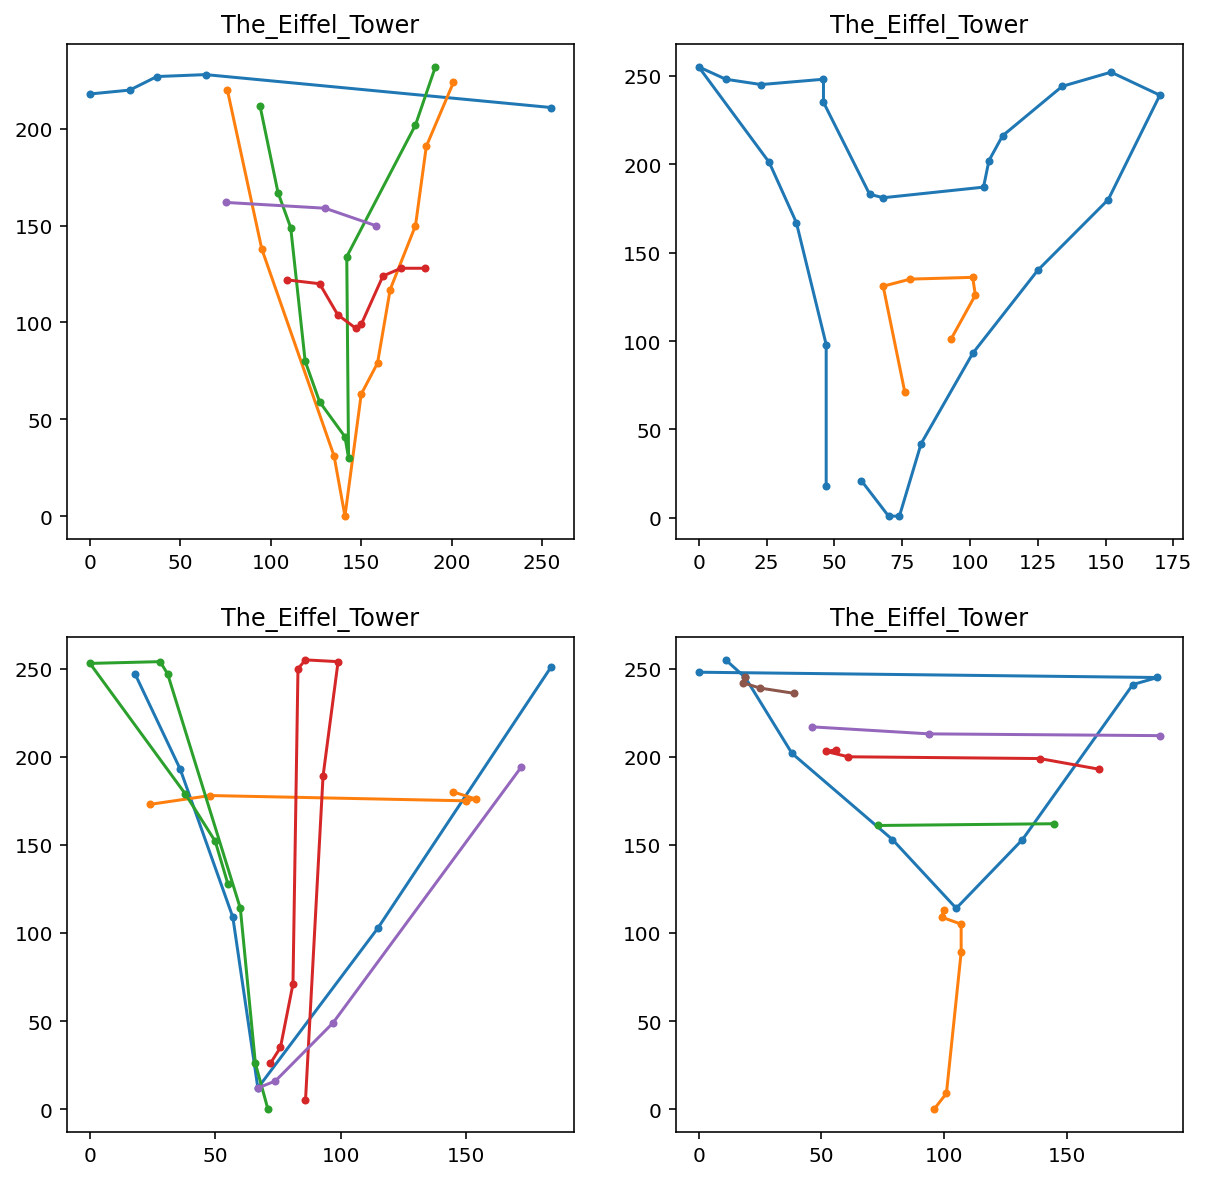

In [6]:
plt.figure(figsize=(10, 10))
for i, drawing in enumerate(drawings):
    plt.subplot(220 + (i+1))
    for x, y in drawing:
        plt.plot(x, y, marker='.')
        plt.title(words[i])